# Chapter 10 - Reinforcement Learning

The following exercises, code, and explanations are adapted from An Introduction to Statistical Learning with Applications in Python (ISLP) (James, Witten, Hastie, Tibshirani, and Taylor 2023).

Make sure the following packages are installed prior to running code in this notebook:
- `numpy`
- `matplotlib`

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise: Umbrella Carry Simulation (Learning from Experience)

The following simulation code was created by ChatGPT to demonstrate the **Umbrella Carry Scenario** discussed in the presentation.  

It models a simple reinforcement learning agent deciding each day whether or not to carry an umbrella, based on past experience with random weather outcomes.

First we will set up the simulation settings. We set the learning rate at 0.1. We assume that there is a 50/50 change of rain each day. A random seed is set for reproducibility.

In [15]:
np.random.seed(42)
num_days = 30
learning_rate = 0.1
rain_prob = 0.5

We set our initial Q-values at 0.5 for both taking and not taking an umbrella.

In [9]:
Q_take_umbrella = 0.5
Q_dont_take_umbrella = 0.5

We also create vectors for holding our history which will be used for plotting.

In [10]:
Q1_history = []
Q2_history = []
rain_history = []
action_history = []
reward_history = []

Now we run the simulation cell and visualize how the agent learns over time.

In [11]:
for day in range(num_days):
    # Simulate weather (rain or not)
    rain_today = np.random.rand() < rain_prob
    rain_history.append(rain_today)
    
    # Choose action based on current Q-values (greedy policy)
    if Q_take_umbrella > Q_dont_take_umbrella:
        action = "Take Umbrella"
    else:
        action = "Don't Take Umbrella"
    action_history.append(action)
    
    # Assign reward based on action and rain
    if action == "Take Umbrella":
        reward = 1.0 if rain_today else 0.5  # Dry or slight inconvenience
        Q_take_umbrella += learning_rate * (reward - Q_take_umbrella)
        Q_dont_take_umbrella = 1 - Q_take_umbrella
    else:
        reward = 0.0 if rain_today else 1.0  # Wet or perfect call
        Q_dont_take_umbrella += learning_rate * (reward - Q_dont_take_umbrella)
        Q_take_umbrella = 1 - Q_dont_take_umbrella
    
    reward_history.append(reward)
    Q1_history.append(Q_take_umbrella)
    Q2_history.append(Q_dont_take_umbrella)

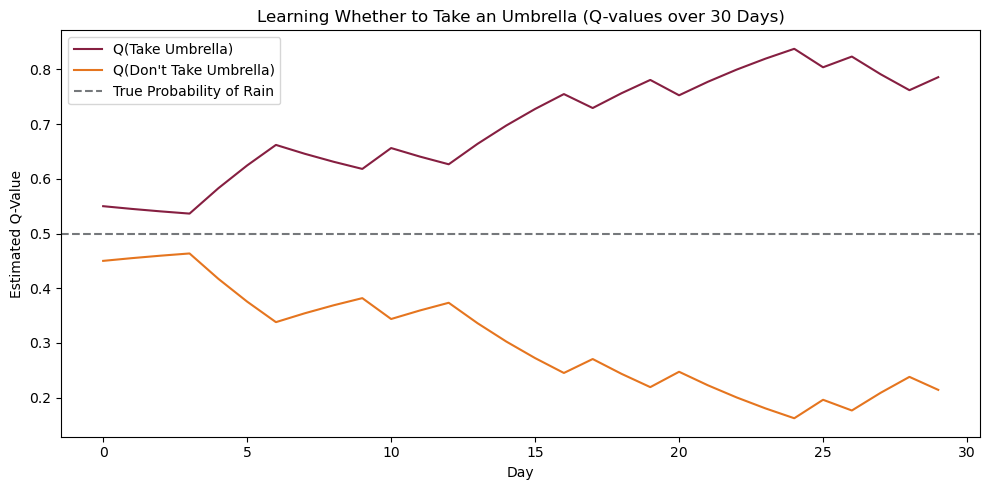

In [12]:
plt.figure(figsize = (10, 5))
plt.plot(Q1_history, color = '#861F41', label = "Q(Take Umbrella)")
plt.plot(Q2_history, color = '#E5751F', label = "Q(Don't Take Umbrella)")
plt.axhline(y = rain_prob, color = '#75787b', linestyle = '--', label = "True Probability of Rain")
plt.title("Learning Whether to Take an Umbrella (Q-values over 30 Days)")
plt.xlabel("Day")
plt.ylabel("Estimated Q-Value")
plt.legend()
plt.tight_layout()
plt.show()